In [1]:
from fastai.vision import *

In [2]:
directory = r'D:/deepACS/v1/dataset'
path = Path(directory)

In [3]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['A', 'D', 'None']

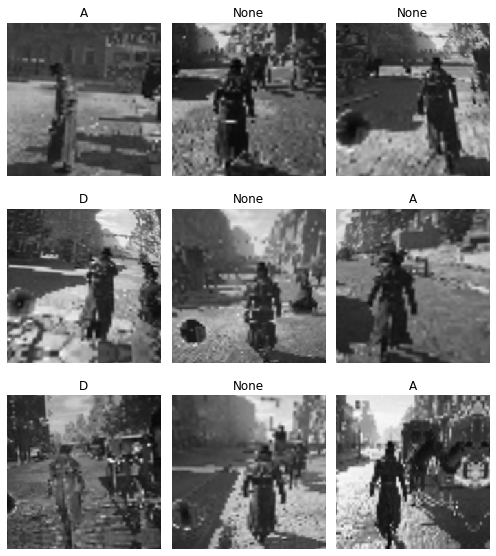

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
learn.fit_one_cycle(8)      # 18

epoch,train_loss,valid_loss,accuracy,time
0,1.400494,0.851641,0.626347,02:15
1,1.033612,0.706823,0.680705,01:43
2,0.835184,0.611876,0.731636,01:43
3,0.745184,0.502798,0.794809,01:42
4,0.644582,0.440576,0.809501,01:43
5,0.594922,0.399533,0.834966,01:43
6,0.535759,0.372071,0.841822,01:42
7,0.508413,0.369813,0.846719,01:43


In [8]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.512608,0.351991,0.853085,01:41
1,0.523279,0.363706,0.849167,01:42
2,0.517868,0.314269,0.881489,01:52
3,0.475352,0.260409,0.897160,01:47
4,0.415929,0.233901,0.905975,01:44
5,0.372675,0.197913,0.923604,01:45
6,0.335653,0.185954,0.931440,01:45
7,0.305874,0.162479,0.937316,01:45
8,0.306103,0.155741,0.941724,01:44
9,0.283217,0.151786,0.947600,01:45


In [9]:
learn.save('resnet-stage-1')

In [10]:
learn.export()

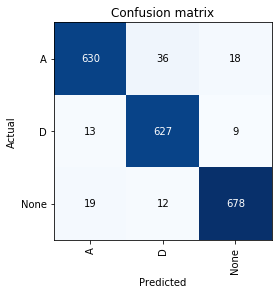

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
learn.unfreeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.961951,0.509058,0.816846,02:08
1,0.375658,0.165719,0.937806,02:03
2,0.166080,0.071634,0.975024,02:03
3,0.070975,0.038602,0.986288,02:03


In [10]:
learn.save('resnet-unfreezed-stage-1')
learn.export()

In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


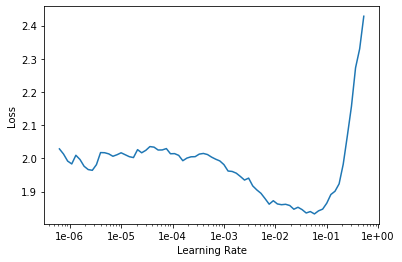

In [8]:
learn.recorder.plot()

In [9]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,1.882388,2077.367188,0.341332,02:06
1,1.418154,0.992259,0.547502,02:04
2,0.967350,0.633989,0.733595,02:04
3,0.708001,0.540503,0.780118,02:03


In [10]:
learn.export()

In [6]:
learn = load_learner(path)